In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.1.2


## Data (preparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheets
* Images
* Videos
* Audio
* DNA
* Text

Two parts of ML
1. Get data into numerical representation
2. Build model to learn patterns

### Let's create some known data using the linear regression forumla!

Make a straight line with known **parameters**

In [3]:
# Create parameters
weight = 0.69
bias = 0.420

# Create some data

start = 0.0
end = 1.0
step = 0.02

X = torch.arange(start, end+step, step).unsqueeze(dim=1)
y = weight * X + bias

### Splitting data into training and test sets
One of most important concepts

Let's create training and test sets with our data

In [4]:
train_split = int(0.8 * len(X))

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Number of train samples: { len(X_train) } features, { len(y_train) } labels.")
print(f"Number of test samples: { len(X_test) } features, { len(y_test) } labels.")

Number of train samples: 40 features, 40 labels.
Number of test samples: 11 features, 11 labels.


## Visualising the data

In [6]:
def plot_prediction(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend(prop={"size" : 14})

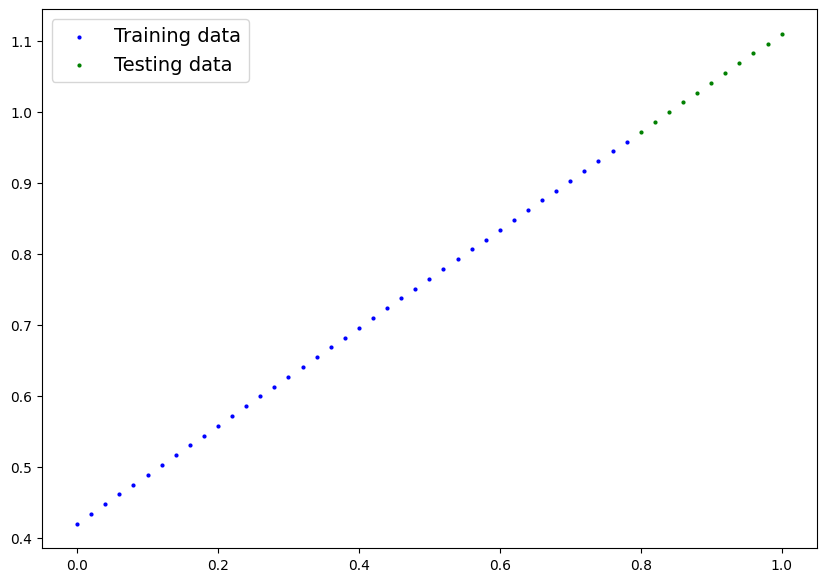

In [7]:
plot_prediction(X_train, y_train, X_test, y_test)

## Build model

In [8]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float)
        )
        self.bias = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear regression formula

### PyTorch model building

* Torch.nn contains all the building blocks for computational graphs.
* torch.nn.Parameter - what parameters should our model try and learn
* torch.nn.Module - base class for all neural network modules
* torch.optim - this is where the optimzers in PyTorch live
* def forward() - All nn.Module subclasses require overwriting forward, this method defines what happens in forward computation

### Checking contents of a pytorch model

In [9]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [10]:
def print_model_params(model : nn.Module):
    params = model_0.state_dict()
    print("Parameters \n")
    for k in params:
        print(f"{k} : {params[k]}")

In [11]:
print_model_params(model_0)

Parameters 

weights : tensor([0.3367])
bias : tensor([0.1288])


### Making prediction using `torch.inference_mode()`

In [12]:
with torch.inference_mode():
    y_preds = model_0(X_test)

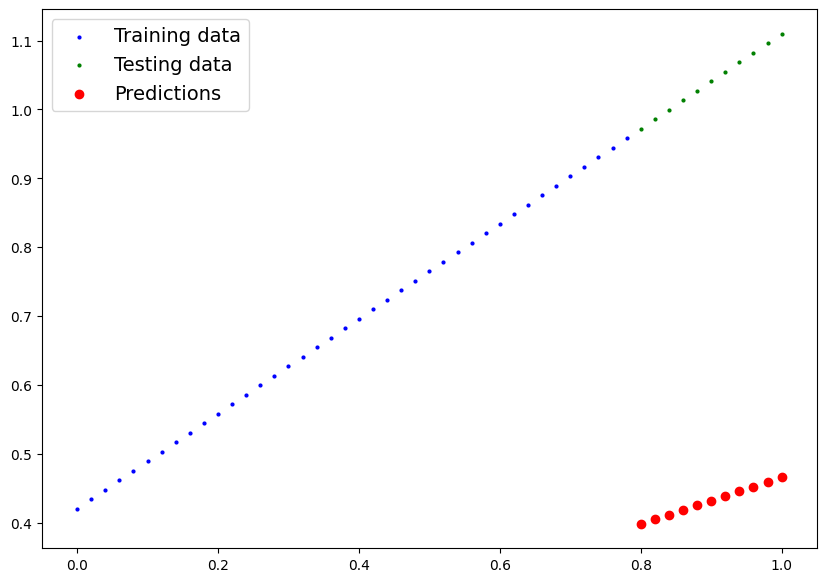

In [13]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds)